# Transactional Data out of "Talente Netz Tirol" 2011 - 2020
# EDA + Prediction of future transaction volume

In [1]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl
sns.set(color_codes=True)
from datetime import date
from datetime import datetime
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
df = pd.read_csv("data/transactions_talentenetz.csv", sep=";", decimal="," )
df.head()
#print(df.head(10))
#df.info()

,id,date,kto_from,kto_to,description,amount,currency_symbol
0,6926,01.01.2011 21:26:39,1536,1552,Schnee,1.5,Tt.
1,6930,04.01.2011 14:57:59,5056,1562,f�r Waffeln beim Treffen am 7.12.2010 danke,1.0,Tt.
2,6946,04.01.2011 21:47:59,5056,1602,F�r Raumben�tzung und Bewirtung am 4. 1. danke,2.0,Tt.
3,6948,05.01.2011 11:25:35,1420,3323,verschiedene Salben,6.3,Tt.
4,7264,06.01.2011 10:08:22,1377,1170,F�r �pfel,1.0,Tt.


In [4]:
# Converting the date to Date Time Object 
df["date"] =  pd.to_datetime(df["date"], format="%d.%m.%Y %H:%M:%S")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6845 entries, 0 to 6844
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               6845 non-null   int64         
 1   date             6845 non-null   datetime64[ns]
 2   kto_from         6845 non-null   int64         
 3   kto_to           6845 non-null   int64         
 4   description      6845 non-null   object        
 5   amount           6845 non-null   float64       
 6   currency_symbol  6845 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 374.5+ KB


In [5]:
# Counting the number of transactions = 6845
df.count()
#print(df.count())
size = 6845

In [6]:
# Check if missing values are given = 0
print(df.isnull().sum())

id                 0
date               0
kto_from           0
kto_to             0
description        0
amount             0
currency_symbol    0
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


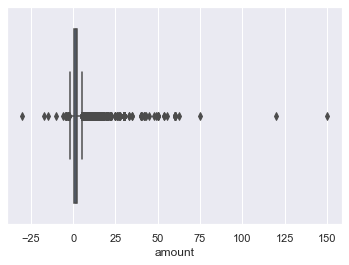

In [7]:
# Boxplot to check for existing outliers 
print(sns.boxplot(x=df["amount"]))

AxesSubplot(0.125,0.125;0.775x0.755)


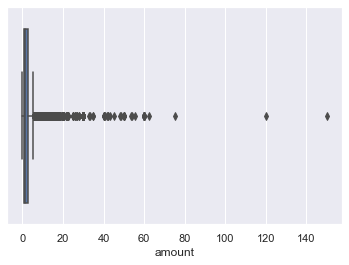

In [8]:
# Drop negative values 

# Get indexes where amount is negative
indexNames = df[~(df["amount"] >=0)].index 

# Delete these row indexes from df
df.drop(indexNames , inplace=True)

print(sns.boxplot(x=df["amount"]))

In [9]:
# Mean, Median, Mode of Transactions before removing outliers
mean_before = df["amount"].mean()
median_before = df["amount"].median()
mode_before = df["amount"].mode()

print(mean_before)
print(median_before)
print(mode_before)

# Mean   = 2.828495145631068
# Median = 1.5
# Mode   = 1.0

2.828495145631068
1.5
0    1.0
dtype: float64


6545/6845 data points remain.
Int64Index([  83,   99,  126,  204,  210,  224,  242,  252,  322,  324,
            ...
            6424, 6431, 6432, 6446, 6469, 6471, 6482, 6573, 6743, 6825],
           dtype='int64', length=134)
Int64Index([  83,   99,  126,  204,  210,  224,  242,  252,  322,  324,
            ...
            6424, 6431, 6432, 6446, 6469, 6471, 6482, 6573, 6743, 6825],
           dtype='int64', length=134)


,id,date,kto_from,kto_to,description,amount,currency_symbol
0,6926,2011-01-01 21:26:39,1536,1552,Schnee,1.50,Tt.
1,6930,2011-01-04 14:57:59,5056,1562,f�r Waffeln beim Treffen am 7.12.2010 danke,1.00,Tt.
2,6946,2011-01-04 21:47:59,5056,1602,F�r Raumben�tzung und Bewirtung am 4. 1. danke,2.00,Tt.
3,6948,2011-01-05 11:25:35,1420,3323,verschiedene Salben,6.30,Tt.
4,7264,2011-01-06 10:08:22,1377,1170,F�r �pfel,1.00,Tt.
...,...,...,...,...,...,...,...
6840,33247,2020-12-18 08:13:27,8302,1665,Danke f�r Deine Hilfe am PC!,1.00,Tt.
6841,33248,2020-12-18 08:14:11,8302,3305,DANKE,4.00,Tt.
6842,33249,2020-12-21 12:36:41,1515,10824,danke f�r das Traubenkissen,2.50,Tt.
6843,33250,2020-12-22 07:57:15,1220,4570,1 FuZo Massage am 17.12.20 Lieben Dank!,1.00,Tt.


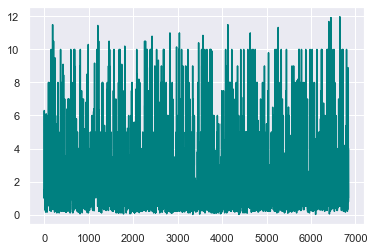

In [12]:
# Remove Outliers in last quantile (adjusted to .98 percentile)
y = df["amount"]
removed_outliers = y.between(y.quantile(.00), y.quantile(.98))

print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot(color="teal").get_figure()

index_names = df[~removed_outliers].index # INVERT removed_outliers
print(index_names) # The resulting outliers to drop.

index_names = df[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting 20 dates to drop.

df.drop(index_names, inplace=True)

df


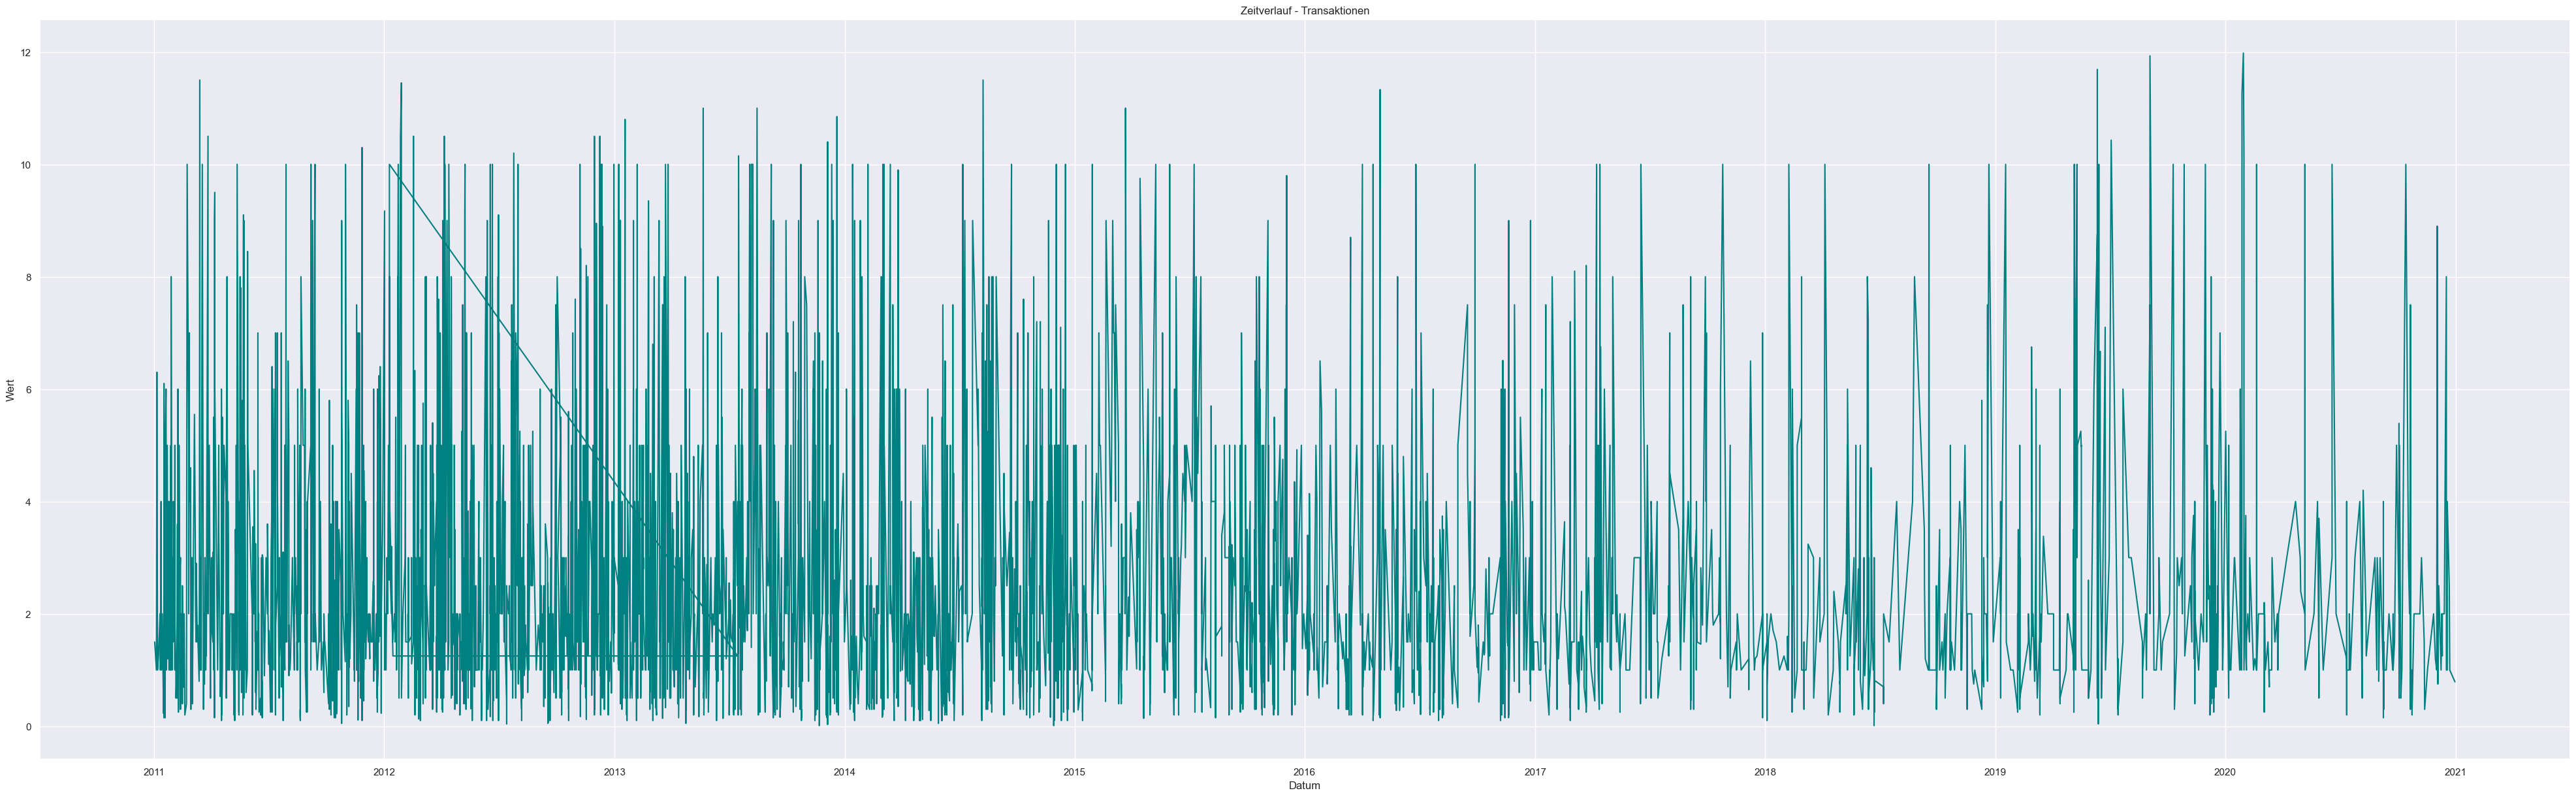

In [15]:
# Time Series Plot 
def plot_df(df, x, y, title="", xlabel="Datum", ylabel="Wert", dpi=100):
    plt.figure(figsize=(50,15), dpi=dpi)
    plt.plot(x, y, color="teal")
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.date, y=df.amount, title="Zeitverlauf - Transaktionen")    

Text(0.5, 1.0, 'Monatlicher Plot der Talentanzahl')

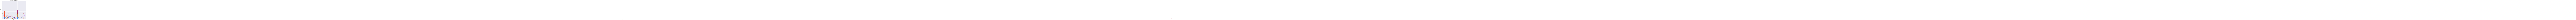

In [18]:
# Monthly Plot of Talents transacted per year 
# Prepare data
df["Jahr"] = [d.year for d in df.date]
df["Monat"] = [d.strftime("%m") for d in df.date]
years = df["Jahr"].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 40)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot("Monat", "amount", data=df.loc[df.Jahr==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.Jahr==y, :].shape[0]-.9, df.loc[df.Jahr==y, "amount"][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 22), ylabel="$Talente$", xlabel="$Monat$")
plt.yticks(fontsize=12, alpha=.7)
plt.title("Monatlicher Plot der Talentanzahl", fontsize=20)

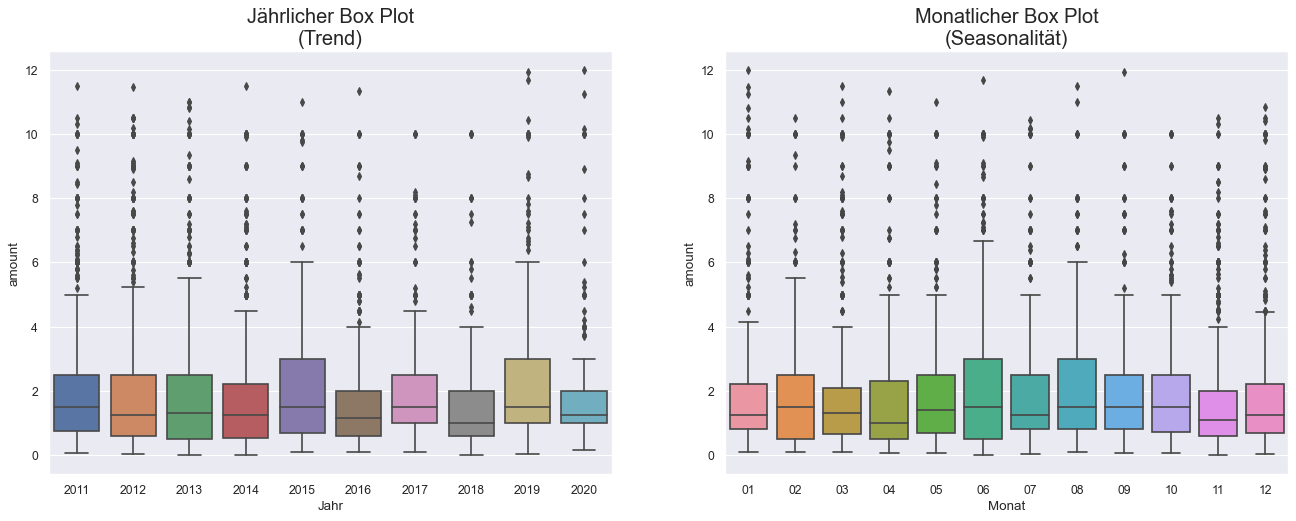

In [19]:
#Boxplot for monthly transactions per year 
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x="Jahr", y="amount", data=df, ax=axes[0])
sns.boxplot(x="Monat", y="amount", data=df.loc[~df.date.isin([1991, 2008]), :])

# Set Title
axes[0].set_title("Jährlicher Box Plot\n(Trend)", fontsize=18); 
axes[1].set_title("Monatlicher Box Plot\n(Seasonalität)", fontsize=18)
plt.show()

This plot show, that the entries of the transaction have mainly been done centrally at one time. There is no real difference over the years. In May and June there was less talent transfers than in other months. 

In [20]:
# Mean, Median, Mode of Transactions after removing outliers
mean_after = df["amount"].mean()
median_after = df["amount"].median()
mode_after = df["amount"].mode()

print(mean_after)
print(median_after)
print(mode_after)

# Mean   = 1.9540718105423986
# Median = 1.3
# Mode   = 1.0

1.9540718105423986
1.3
0    1.0
dtype: float64


In [21]:
# Number of Transactions per user 
df.groupby(["kto_from"]).size() # 281 unique kto_from
df.groupby(["kto_to"]).size() # 279 unique kto_to


kto_to
1052      10
1065       2
1068       1
1093       5
1099       4
        ... 
10306      1
10586     56
10657      2
10824    114
10917      6
Length: 279, dtype: int64

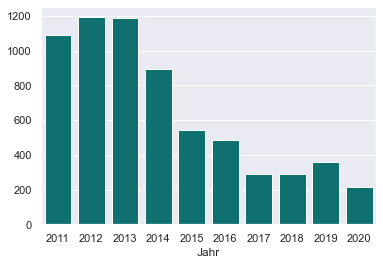

In [25]:
# Number of Transactions per year 
yearly_transactions = df.groupby(["Jahr"]).size()
#2011    1088
#2012    1192
#2013    1190
#2014     892
#2015     542
#2016     486
#2017     288
#2018     289
#2019     361
#2020     217
yearly_transactions

# Plot 
sns.barplot(x = yearly_transactions.index, y = yearly_transactions.values, color = "teal")

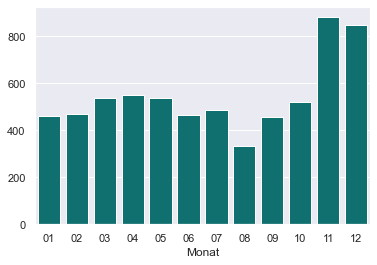

In [27]:
# Number of Transactions per month 
monthly_transactions = df.groupby(["Monat"]).size()

# Plot 
sns.barplot(x = monthly_transactions.index, y = monthly_transactions.values, color = "teal")

In [24]:
# Linear Regression to predict amount of transactions for 2021 - 161.39287958
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from random import random

# dataset with grouped transactions
data = yearly_transactions.values
# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)


[161.39287958]
